# Convnets MNIST

In [ ]:
from keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

### Construction d'un CNN

### Ajout d'un classificateur au CNN 

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

### Entraînement du réseau sur les images MNIST

In [ ]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 12s 7ms/step - loss: 0.1741 - accuracy: 0.9460
Epoch 2/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0477 - accuracy: 0.9853
Epoch 3/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0322 - accuracy: 0.9902
Epoch 4/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0248 - accuracy: 0.9921
Epoch 5/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0198 - accuracy: 0.9942


### Évaluation du modèle

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 2s 6ms/step - loss: 0.0250 - accuracy: 0.9926


0.9926000237464905

# Entraînement d'un convnet sur un petit ensemble de données

In [ ]:
import os, shutil

original_dataset_dir = '/Users/B.Mehdi/Desktop/Cours/dogs-vs-cats/train1'

base_dir = '/Users/B.Mehdi/Desktop/Cours/dogs-vs-cats/cats_and_dogs_small'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
print(len(os.listdir(train_cats_dir)),len(os.listdir(train_dogs_dir)),len(os.listdir(validation_cats_dir)),
      len(os.listdir(validation_dogs_dir)),
      len(os.listdir(test_cats_dir)),len(os.listdir(test_dogs_dir)))

1000 1000 500 500 500 500


### Construction du réseau 

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

In [ ]:
from keras import optimizers

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

### Prétraitement des données

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')
validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [ ]:
history = model.fit(train_generator,steps_per_epoch=100,
                    epochs=30,validation_data=validation_generator,
                    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 6s 49ms/step - loss: 0.6876 - acc: 0.5390 - val_loss: 0.6682 - val_acc: 0.6160
Epoch 2/30
100/100 [==============================] - 3s 33ms/step - loss: 0.6546 - acc: 0.6255 - val_loss: 0.6671 - val_acc: 0.5940
Epoch 3/30
100/100 [==============================] - 3s 33ms/step - loss: 0.6142 - acc: 0.6695 - val_loss: 0.6121 - val_acc: 0.6590
Epoch 4/30
100/100 [==============================] - 3s 32ms/step - loss: 0.5687 - acc: 0.6965 - val_loss: 0.6061 - val_acc: 0.6600
Epoch 5/30
100/100 [==============================] - 3s 33ms/step - loss: 0.5437 - acc: 0.7105 - val_loss: 0.5763 - val_acc: 0.6950
Epoch 6/30
100/100 [==============================] - 3s 33ms/step - loss: 0.5143 - acc: 0.7330 - val_loss: 0.5594 - val_acc: 0.7180
Epoch 7/30
100/100 [==============================] - 3s 32ms/step - loss: 0.4849 - acc: 0.7610 - val_loss: 0.5515 - val_acc: 0.7200
Epoch 8/30
100/100 [==============================] - 3s 33ms/step - 

In [ ]:
model.save('/Users/B.Mehdi/Desktop/Cours/dogs-vs-cats/cats_and_dogs_small/cats_and_dogs_small_1.h5')

### Les courbes de perte et de précision pendant l'apprentissage

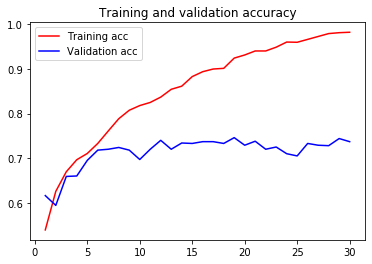

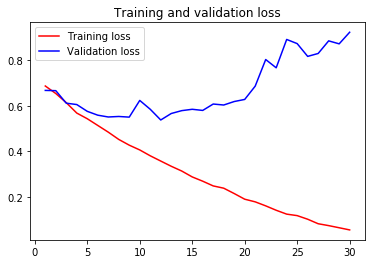

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Augmentation des données via ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

#### rotation_range 
est une valeur en degrés (0-180), une plage dans laquelle il est possible d'effectuer une rotation aléatoire des images.
#### width_shift et height_shift
sont des plages (sous forme de fraction de la largeur ou de la hauteur totale)
dans lesquelles les images peuvent être translatées verticalement ou horizontalement de manière aléatoire.
#### shear_range
permet d'appliquer aléatoirement des transformations de distorsion.
#### zoom_range
permet de zoomer de manière aléatoire dans les images.
#### horizontal_flip
permet d'inverser de façon aléatoire la moitié des images dans le sens horizontal.
#### fill_mode
est utilisée pour remplir les pixels nouvellement créés, qui peuvent apparaître après une rotation ou un décalage en largeur/hauteur.


### Affichage de quelques images d'entraînement augmentées de façon aléatoire 

In [ ]:
from keras.utils.image_utils import load_img, img_to_array, array_to_img

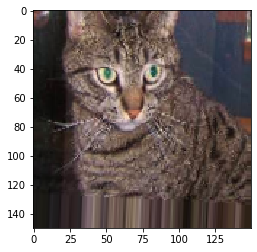

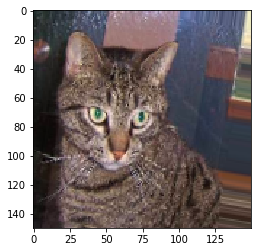

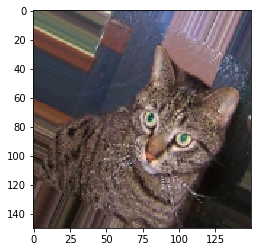

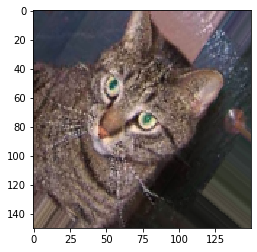

In [ ]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[1]

img = load_img(img_path, target_size=(150, 150))

x = img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

### Définition d'un nouveau convnet qui intègre le dropout 

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', 
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

### Entraînement du réseau à l'aide de générateurs d'augmentation de données 

In [ ]:
train_datagen = ImageDataGenerator( rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                train_dir,
                target_size=(150, 150),
                batch_size=32,
                class_mode='binary')
validation_generator = val_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator, epochs=100,validation_data=validation_generator)

Epoch 1/100
63/63 [==============================] - 12s 169ms/step - loss: 0.6940 - acc: 0.5030 - val_loss: 0.6918 - val_acc: 0.5070
Epoch 2/100
63/63 [==============================] - 10s 165ms/step - loss: 0.6866 - acc: 0.5435 - val_loss: 0.6705 - val_acc: 0.5600
Epoch 3/100
63/63 [==============================] - 10s 163ms/step - loss: 0.6799 - acc: 0.5540 - val_loss: 0.6609 - val_acc: 0.6030
Epoch 4/100
63/63 [==============================] - 10s 165ms/step - loss: 0.6673 - acc: 0.5910 - val_loss: 0.6482 - val_acc: 0.6070
Epoch 5/100
63/63 [==============================] - 10s 162ms/step - loss: 0.6625 - acc: 0.5880 - val_loss: 0.6347 - val_acc: 0.6150
Epoch 6/100
63/63 [==============================] - 10s 163ms/step - loss: 0.6380 - acc: 0.6155 - val_loss: 0.6166 - val_acc: 0.6510
Epoch 7/100
63/63 [==============================] - 10s 166ms/step - loss: 0.6326 - acc: 0.6430 - val_loss: 0.6113 - val_acc: 0.6620
Epoch 8/100
63/63 [==============================] - 11s 167ms

Epoch 62/100
63/63 [==============================] - 11s 182ms/step - loss: 0.4621 - acc: 0.7885 - val_loss: 0.4689 - val_acc: 0.7760
Epoch 63/100
63/63 [==============================] - 10s 160ms/step - loss: 0.4621 - acc: 0.7810 - val_loss: 0.4584 - val_acc: 0.7830
Epoch 64/100
63/63 [==============================] - 10s 160ms/step - loss: 0.4618 - acc: 0.7695 - val_loss: 0.4781 - val_acc: 0.7740
Epoch 65/100
63/63 [==============================] - 10s 158ms/step - loss: 0.4630 - acc: 0.7765 - val_loss: 0.4791 - val_acc: 0.7690
Epoch 66/100
63/63 [==============================] - 10s 158ms/step - loss: 0.4618 - acc: 0.7865 - val_loss: 0.4505 - val_acc: 0.7910
Epoch 67/100
63/63 [==============================] - 10s 161ms/step - loss: 0.4501 - acc: 0.7910 - val_loss: 0.4728 - val_acc: 0.7700
Epoch 68/100
63/63 [==============================] - 10s 158ms/step - loss: 0.4702 - acc: 0.7690 - val_loss: 0.4931 - val_acc: 0.7690
Epoch 69/100
63/63 [==============================] - 1

In [ ]:
model.save('/Users/B.Mehdi/Desktop/Cours/dogs-vs-cats/cats_and_dogs_small/cats_and_dogs_small_2.h5')

### Les courbes de perte et de précision pendant l'apprentissage

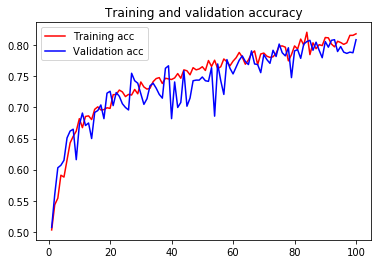

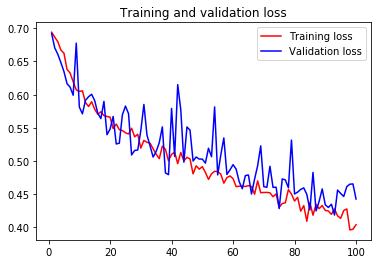

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Utilisation d'un CNN pré-entraîné

### L'utilisation de la base de convolution du VGG16

In [ ]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

### Extraction de caractéristiques en utilisant la base de convolution pré-entraînée 

In [ ]:
import numpy as np

base_dir = '/Users/B.Mehdi/Desktop/Cours/dogs-vs-cats/cats_and_dogs_small'
train_dir ='/Users/B.Mehdi/Desktop/Cours/dogs-vs-cats/cats_and_dogs_small/train'
validation_dir = '/Users/B.Mehdi/Desktop/Cours/dogs-vs-cats/cats_and_dogs_small/validation'
test_dir = '/Users/B.Mehdi/Desktop/Cours/dogs-vs-cats/cats_and_dogs_small/test'

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch, verbose=0)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [ ]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4), 
              loss='binary_crossentropy',
              metrics=['acc'])

In [ ]:
history1 = model.fit(train_features, train_labels,
                    epochs=30,batch_size=20,
                    validation_data=(validation_features,
                                     validation_labels))

Epoch 1/30
100/100 [==============================] - 1s 11ms/step - loss: 0.4651 - acc: 0.7715 - val_loss: 0.4001 - val_acc: 0.8100
Epoch 2/30
100/100 [==============================] - 1s 7ms/step - loss: 0.3019 - acc: 0.8735 - val_loss: 0.3197 - val_acc: 0.8560
Epoch 3/30
100/100 [==============================] - 1s 7ms/step - loss: 0.2537 - acc: 0.8975 - val_loss: 0.2533 - val_acc: 0.8940
Epoch 4/30
100/100 [==============================] - 1s 7ms/step - loss: 0.2108 - acc: 0.9170 - val_loss: 0.2533 - val_acc: 0.9010
Epoch 5/30
100/100 [==============================] - 1s 7ms/step - loss: 0.1794 - acc: 0.9315 - val_loss: 0.2511 - val_acc: 0.9020
Epoch 6/30
100/100 [==============================] - 1s 7ms/step - loss: 0.1680 - acc: 0.9330 - val_loss: 0.2582 - val_acc: 0.9010
Epoch 7/30
100/100 [==============================] - 1s 7ms/step - loss: 0.1295 - acc: 0.9480 - val_loss: 0.2732 - val_acc: 0.8980
Epoch 8/30
100/100 [==============================] - 1s 7ms/step - loss: 0

###  Plotting the results 

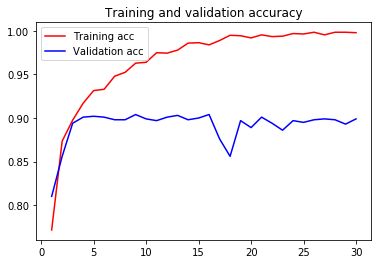

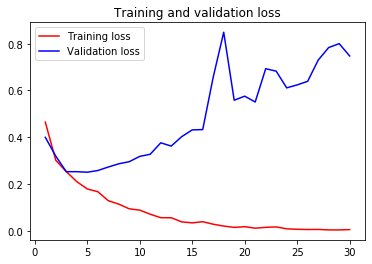

In [ ]:
import matplotlib.pyplot as plt
acc = history1.history['acc']
val_acc = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### L'ajout d'un classificateur dense à la base de convolution

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### Blocage de la base de convolution et l'entraînement du modèle avec augmentation des données

In [ ]:
conv_base.trainable = False

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])
history2 = model.fit(train_generator, epochs=30, steps_per_epoch=100,
                        validation_data=validation_generator, validation_steps=50)

Epoch 1/30
100/100 [==============================] - 13s 115ms/step - loss: 0.5939 - acc: 0.6790 - val_loss: 0.3842 - val_acc: 0.8290
Epoch 2/30
100/100 [==============================] - 11s 114ms/step - loss: 0.4768 - acc: 0.7600 - val_loss: 0.2948 - val_acc: 0.8790
Epoch 3/30
100/100 [==============================] - 11s 115ms/step - loss: 0.4309 - acc: 0.7965 - val_loss: 0.3238 - val_acc: 0.8570
Epoch 4/30
100/100 [==============================] - 12s 116ms/step - loss: 0.4087 - acc: 0.8140 - val_loss: 0.2925 - val_acc: 0.8760
Epoch 5/30
100/100 [==============================] - 11s 114ms/step - loss: 0.4011 - acc: 0.8110 - val_loss: 0.2757 - val_acc: 0.8800
Epoch 6/30
100/100 [==============================] - 12s 115ms/step - loss: 0.3845 - acc: 0.8210 - val_loss: 0.2760 - val_acc: 0.8770
Epoch 7/30
100/100 [==============================] - 12s 116ms/step - loss: 0.3840 - acc: 0.8245 - val_loss: 0.2589 - val_acc: 0.8980
Epoch 8/30
100/100 [==============================] - 1

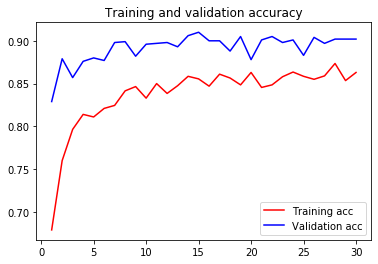

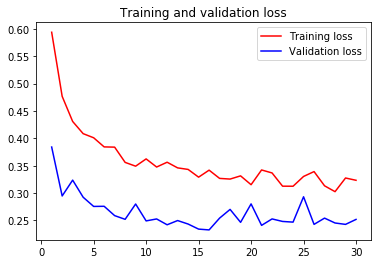

In [ ]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Fine-tuning

### Déblocage de certaines couches de la base de convolution

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_15 (Flatten)        (None, 8192)              0         
                                                                 
 dense_35 (Dense)            (None, 512)               4194816   
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_36 (Dense)            (None, 256)               131328    
                                                                 
 dense_37 (Dense)            (None, 1)                 257       
                                                                 
Total params: 19,041,089
Trainable params: 11,405,825

### Fine-tuning du modèle

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])
history3 = model.fit(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 13s 119ms/step - loss: 0.2634 - acc: 0.8990 - val_loss: 0.2287 - val_acc: 0.9180
Epoch 2/30
100/100 [==============================] - 12s 122ms/step - loss: 0.2352 - acc: 0.9005 - val_loss: 0.2281 - val_acc: 0.9220
Epoch 3/30
100/100 [==============================] - 12s 116ms/step - loss: 0.2158 - acc: 0.9085 - val_loss: 0.2362 - val_acc: 0.9200
Epoch 4/30
100/100 [==============================] - 12s 117ms/step - loss: 0.2161 - acc: 0.9090 - val_loss: 0.2250 - val_acc: 0.9290
Epoch 5/30
100/100 [==============================] - 11s 114ms/step - loss: 0.2057 - acc: 0.9160 - val_loss: 0.2392 - val_acc: 0.9220
Epoch 6/30
100/100 [==============================] - 11s 114ms/step - loss: 0.1926 - acc: 0.9210 - val_loss: 0.2338 - val_acc: 0.9220
Epoch 7/30
100/100 [==============================] - 11s 114ms/step - loss: 0.1834 - acc: 0.9240 - val_loss: 0.2274 - val_acc: 0.9170
Epoch 8/30
100/100 [==============================] - 1

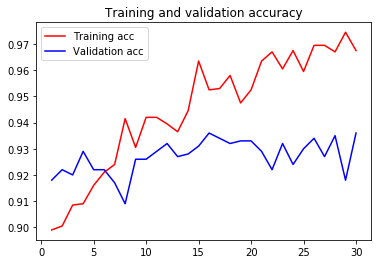

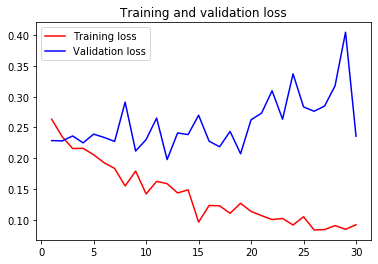

In [ ]:
acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Evaluation 

In [ ]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=20,
                                                  class_mode='binary')
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 3s 49ms/step - loss: 0.2904 - acc: 0.9330
test acc: 0.9330000281333923


### Visualisation des activations intermédiaires 

In [ ]:
from keras.models import load_model

In [ ]:
model = load_model('/Users/B.Mehdi/Desktop/Cours/dogs-vs-cats/cats_and_dogs_small/cats_and_dogs_small_2.h5')

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 17, 17, 128)     

In [ ]:
img_path = '/Users/B.Mehdi/Desktop/Cours/dogs-vs-cats/cats_and_dogs_small/test/cats/cat.1700.jpg'

In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [ ]:
img = load_img(img_path, target_size=(150, 150))
img_tensor = img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

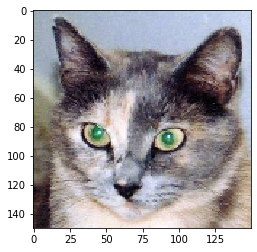

In [ ]:
plt.imshow(img)

### Création d'un modèle à partir d'un tenseur d'entrée et d'une liste de tenseurs de sortie

In [ ]:
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [ ]:
activations = activation_model.predict(img_tensor)

1/1 [==============================] - 0s 389ms/step


In [ ]:
first_layer_activation = activations[0]

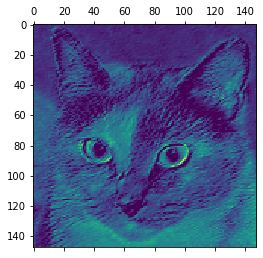

In [ ]:
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')

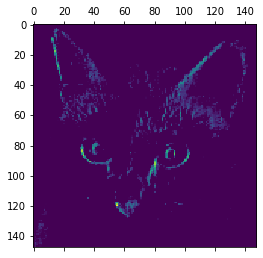

In [ ]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

### Visualisation de toutes les activations intermédiaires

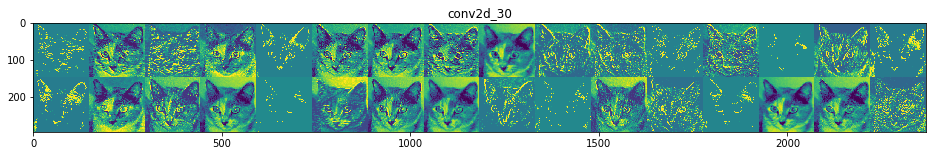

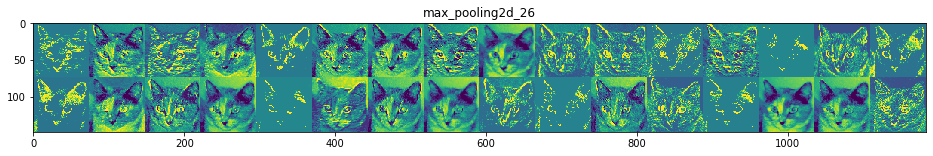

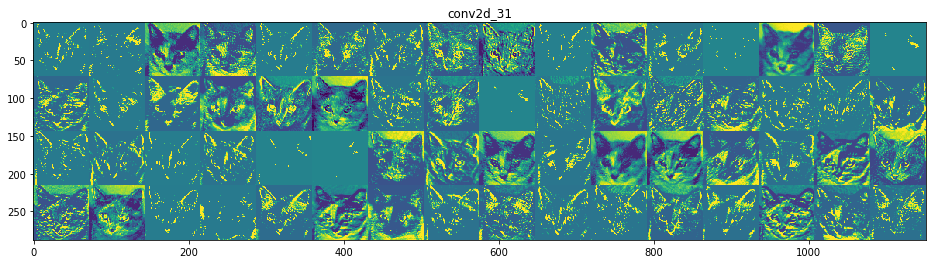

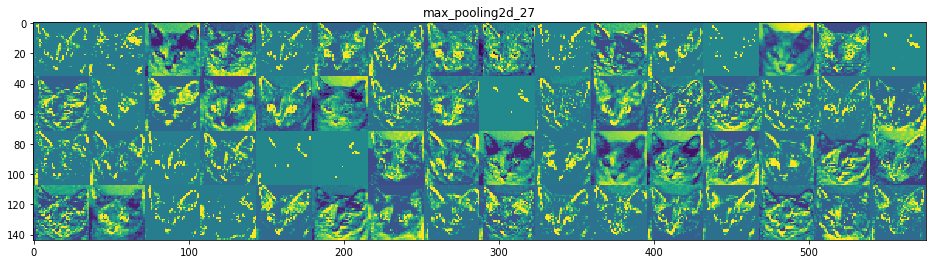

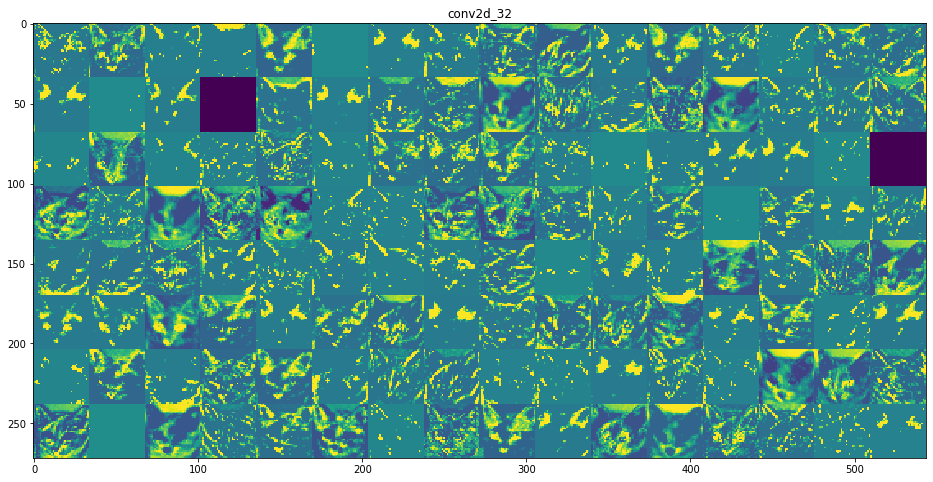

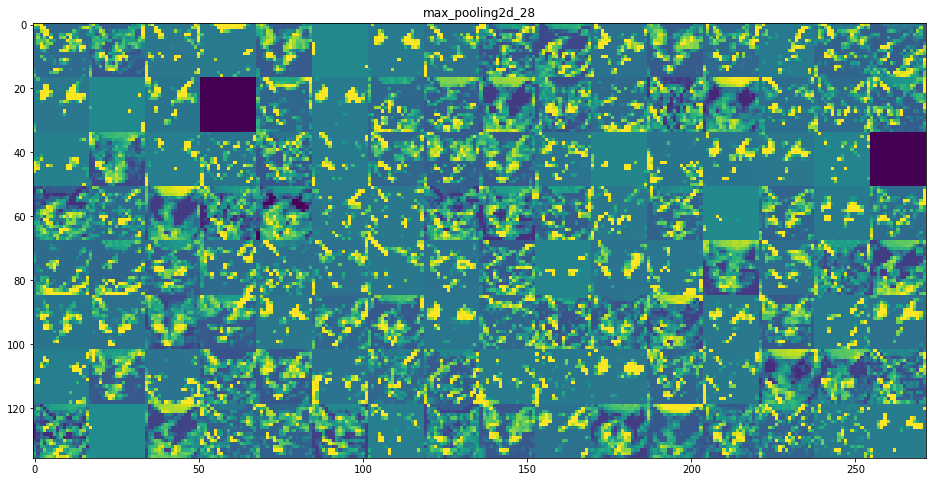

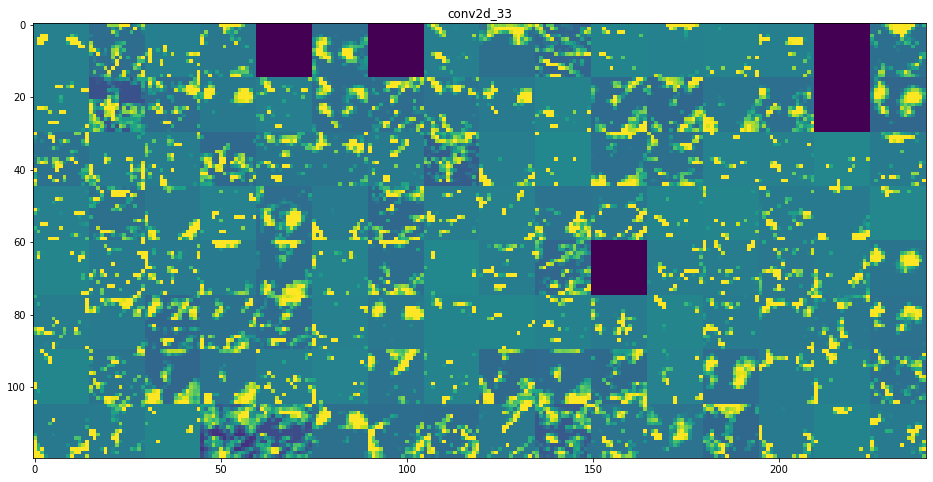

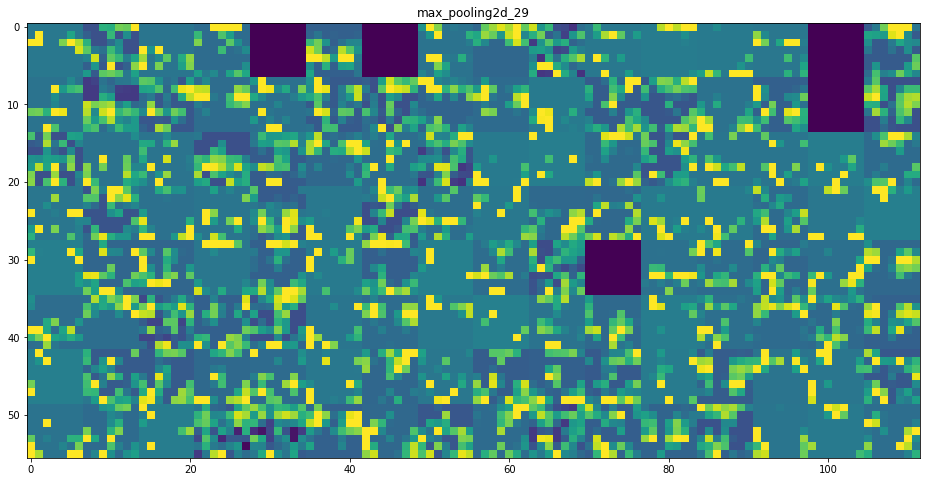

In [ ]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:,:,col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image
     
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis') 

### Visualisation des filtres 

In [ ]:
filters, biases = model.layers[0].get_weights()

In [ ]:
filters.shape

(3, 3, 3, 32)

In [ ]:
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

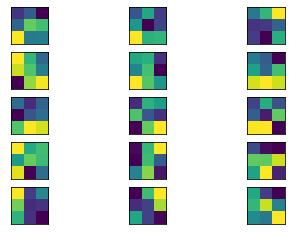

In [ ]:
n_filters, k = 5, 1
for i in range(n_filters):
    f = filters[:, :, :, i]
    for j in range(3):
        ax = plt.subplot(n_filters, 3, k)
        ax.set_xticks([])
        ax.set_yticks([])

        plt.imshow(f[:, :, j], cmap='viridis')
        k += 1

plt.show()

#### Définition du tenseur de perte pour la visualisation des filtres 

In [ ]:
from keras import backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
model = VGG16(weights='imagenet',
              include_top=False)
layer_name = 'block3_conv1'
filter_index = 0
layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

#### Obtention du gradient de la perte par rapport à l'entrée 

In [ ]:
grads = K.gradients(loss, model.input)[0]
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

#### Définition d'une fonction Keras pour récupérer les valeurs de sortie Numpy à partir des valeurs d'entrée Numpy

In [ ]:
iterate = K.function([model.input], [loss, grads])

####  Maximisation de la perte par descente de gradient stochastique sur les paramètres d'entrée. 

#### Convertir un tenseur en une image

In [ ]:
def process_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

#### Une fonction pour générer des visualisations de filtres 

In [ ]:
def generate_pattern(layer_name, filter_index, size=150):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])

    grads = K.gradients(loss, model.input)[0]

    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

    iterate = K.function([model.input], [loss, grads])
 
    input_img_data = np.random.random((1, size, size, 3))

    step = 1.
    for i in range(100):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
    img = input_img_data[0]
    return process_image(img)

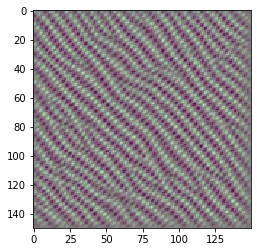

In [ ]:
plt.imshow(generate_pattern('block3_conv1', 15))

###  Visualisation des heatmaps de l'activation des classes

#### Chargement du réseau VGG16 avec des poids pré-entraînés

In [ ]:
model = VGG16(weights='imagenet')

#### Prétraitement d'une image d'entrée pour VGG16 

In [ ]:
from keras.applications.vgg16 import preprocess_input, decode_predictions

img_path = '/Users/B.Mehdi/Desktop/Cours/IMG/dog.jpg'

img = load_img(img_path, target_size=(224, 224))

x_ = img_to_array(img)

x = np.expand_dims(x_, axis=0)

x = preprocess_input(x)

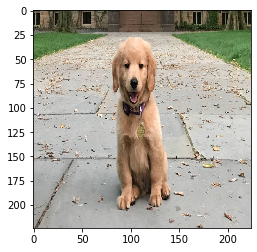

In [ ]:
plt.imshow(img)

#### Prédiction de la classe de l'image

In [ ]:
preds = model.predict(x)
decode_predictions(preds, top=5)

[[('n02099601', 'golden_retriever', 0.89152724),
  ('n02088094', 'Afghan_hound', 0.047944788),
  ('n02091831', 'Saluki', 0.019502573),
  ('n02088466', 'bloodhound', 0.0097103845),
  ('n02099712', 'Labrador_retriever', 0.009245103)]]

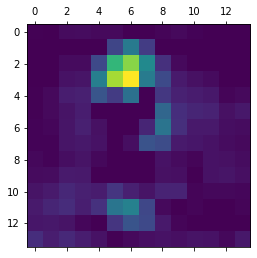

In [ ]:
output = model.output[:, np.argmax(preds[0])]

last_conv_layer = model.get_layer('block5_conv3')

grads = K.gradients(output, last_conv_layer.output)[0]

pooled_grads = K.mean(grads, axis=(0, 1, 2))

iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
heatmap = np.mean(conv_layer_output_value, axis=-1)

heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

####  Superposition du heatmap avec l'image originale

In [ ]:
import cv2

img = cv2.imread(img_path)

heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap * 0.5 + img

cv2.imwrite('/Users/B.Mehdi/Desktop/Cours/IMG/dog_cam.jpg', superimposed_img)

True